In [1]:
import setuptools
%load_ext Cython
# As usual, a bit of setup

import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.cnn import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient_array, eval_numerical_gradient
from cs231n.layers import *
from cs231n.fast_layers import *
from cs231n.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

run the following from the cs231n directory and try again:
python setup.py build_ext --inplace
You may also need to restart your iPython kernel


In [2]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in data.iteritems():
  print '%s: ' % k, v.shape

X_val:  (1000, 3, 32, 32)
X_train:  (49000, 3, 32, 32)
X_test:  (1000, 3, 32, 32)
y_val:  (1000,)
y_train:  (49000,)
y_test:  (1000,)


In [ ]:
model = LinearCNN()

N = 50
X = np.random.randn(N, 3, 32, 32)
y = np.random.randint(10, size=N)

print -np.log(0.1)
loss, grads = model.loss(X, y)
print 'Initial loss (no regularization): ', loss
model.reg = 0.05
loss, grads = model.loss(X, y)
print 'Initial loss (with regularization): ', loss

In [79]:
from cs231n.classifiers.linear_cnn import LinearCNN
num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

model = LinearCNN(conv_sets=[(8,2,2,2),(16,2,2,2),(32,2,2,2),(64,2,2,2),(128,2,2,2)],
                pool_params=[(1,1,1),(1,1,1),(1,1,1),(1,1,1),(1,1,1)],
                aff_dim=[128,128], use_batchnorm=False, reg=1e-4, reset=True)
solver = Solver(model, small_data, num_epochs=20, batch_size=32,
                update_rule='adam', optim_config={'learning_rate': 3e-3,},
                verbose=True, print_every=10)
solver.train()

(Iteration 1 / 20) loss: 3.335239
(Epoch 1 / 20) train acc: 0.160000; val_acc: 0.087000
(Epoch 2 / 20) train acc: 0.220000; val_acc: 0.109000
(Epoch 3 / 20) train acc: 0.320000; val_acc: 0.111000
(Epoch 4 / 20) train acc: 0.400000; val_acc: 0.099000
(Epoch 5 / 20) train acc: 0.480000; val_acc: 0.083000
(Epoch 6 / 20) train acc: 0.500000; val_acc: 0.095000
(Epoch 7 / 20) train acc: 0.520000; val_acc: 0.108000
(Epoch 8 / 20) train acc: 0.600000; val_acc: 0.119000
(Epoch 9 / 20) train acc: 0.600000; val_acc: 0.123000
(Epoch 10 / 20) train acc: 0.640000; val_acc: 0.128000
(Iteration 11 / 20) loss: 1.540117
(Epoch 11 / 20) train acc: 0.620000; val_acc: 0.128000
(Epoch 12 / 20) train acc: 0.640000; val_acc: 0.134000
(Epoch 13 / 20) train acc: 0.640000; val_acc: 0.136000
(Epoch 14 / 20) train acc: 0.660000; val_acc: 0.146000
(Epoch 15 / 20) train acc: 0.700000; val_acc: 0.151000
(Epoch 16 / 20) train acc: 0.740000; val_acc: 0.147000
(Epoch 17 / 20) train acc: 0.800000; val_acc: 0.142000
(Epoc

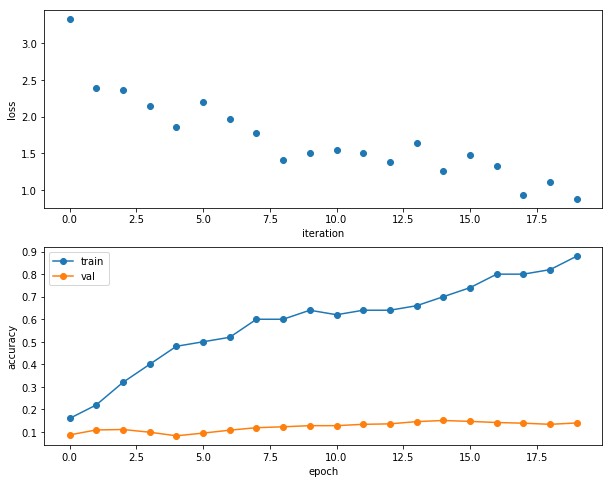

In [80]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [182]:
from cs231n.classifiers.linear_cnn import LinearCNN
num_train = -1
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

model = LinearCNN(conv_sets=[(3,1,1,1),(8,2,2,2),(16,2,2,2),(32,2,2,2),(64,2,2,2)],
                pool_params=[(1,1,1),(1,1,1),(1,1,1),(1,1,1),(1,1,1)],
                aff_dim=[128], use_batchnorm=False, reg=2e-3, reset=True)
solver = Solver(model, small_data, num_epochs=10, batch_size=128,
                update_rule='adam', optim_config={'learning_rate': 1e-3,},
                verbose=True, print_every=100)
solver.train()

(Iteration 1 / 3820) loss: 13.454442
(Epoch 0 / 10) train acc: 0.116000; val_acc: 0.110000
(Iteration 101 / 3820) loss: 2.792191
(Iteration 201 / 3820) loss: 2.235759
(Iteration 301 / 3820) loss: 2.256562
(Epoch 1 / 10) train acc: 0.401000; val_acc: 0.395000
(Iteration 401 / 3820) loss: 3.555797
(Iteration 501 / 3820) loss: 2.052268
(Iteration 601 / 3820) loss: 1.941003
(Iteration 701 / 3820) loss: 2.092270
(Epoch 2 / 10) train acc: 0.488000; val_acc: 0.452000
(Iteration 801 / 3820) loss: 1.975816
(Iteration 901 / 3820) loss: 2.020357
(Iteration 1001 / 3820) loss: 2.029776
(Iteration 1101 / 3820) loss: 1.831730
(Epoch 3 / 10) train acc: 0.526000; val_acc: 0.467000
(Iteration 1201 / 3820) loss: 1.862904
(Iteration 1301 / 3820) loss: 1.728838
(Iteration 1401 / 3820) loss: 1.753787
(Iteration 1501 / 3820) loss: 1.835182
(Epoch 4 / 10) train acc: 0.498000; val_acc: 0.479000
(Iteration 1601 / 3820) loss: 1.636782
(Iteration 1701 / 3820) loss: 1.688440
(Iteration 1801 / 3820) loss: 1.745449


In [186]:
solver = Solver(model, small_data, num_epochs=20, batch_size=128,
                update_rule='adam', optim_config={'learning_rate': 1e-4,},
                verbose=True, print_every=200)
solver.train()

(Iteration 1 / 7640) loss: 1.423998
(Epoch 0 / 20) train acc: 0.599000; val_acc: 0.529000
(Iteration 201 / 7640) loss: 1.347677
(Epoch 1 / 20) train acc: 0.614000; val_acc: 0.544000
(Iteration 401 / 7640) loss: 1.341043
(Iteration 601 / 7640) loss: 1.215049
(Epoch 2 / 20) train acc: 0.608000; val_acc: 0.550000
(Iteration 801 / 7640) loss: 1.472042
(Iteration 1001 / 7640) loss: 1.365173
(Epoch 3 / 20) train acc: 0.654000; val_acc: 0.558000
(Iteration 1201 / 7640) loss: 1.432754
(Iteration 1401 / 7640) loss: 1.295720
(Epoch 4 / 20) train acc: 0.619000; val_acc: 0.552000
(Iteration 1601 / 7640) loss: 1.193173
(Iteration 1801 / 7640) loss: 1.441237
(Epoch 5 / 20) train acc: 0.643000; val_acc: 0.551000
(Iteration 2001 / 7640) loss: 1.253439
(Iteration 2201 / 7640) loss: 1.369242
(Epoch 6 / 20) train acc: 0.613000; val_acc: 0.551000
(Iteration 2401 / 7640) loss: 1.297911
(Iteration 2601 / 7640) loss: 1.319085
(Epoch 7 / 20) train acc: 0.606000; val_acc: 0.553000
(Iteration 2801 / 7640) loss:

In [187]:
best_model = model
val_acc, test_acc = 0, 0
for i in xrange(10):
    j = i*100
    X_test = data['X_test'][j:j+100]
    X_val = data['X_val'][j:j+100]
    y_test = data['y_test'][j:j+100]
    y_val = data['y_val'][j:j+100]
    y_test_pred = np.argmax(best_model.loss(X_test), axis=1) 
    y_val_pred = np.argmax(best_model.loss(X_val), axis=1)
    val_acc += (y_val_pred == y_val).mean()
    test_acc += (y_test_pred == y_test).mean()
print 'Validation set accuracy: ', val_acc/10
print 'Test set accuracy: ', test_acc/10

Validation set accuracy:  0.568
Test set accuracy:  0.546


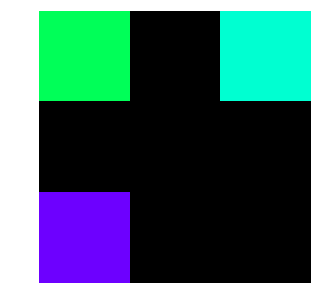

In [188]:
from cs231n.vis_utils import visualize_grid

grid = visualize_grid(model.params['W1'].transpose(0, 2, 3, 1))
plt.imshow(grid.astype('uint8'))
plt.axis('off')
plt.gcf().set_size_inches(5, 5)
plt.show()


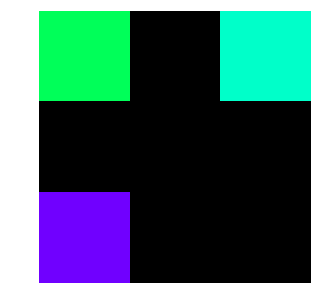

In [185]:
from cs231n.vis_utils import visualize_grid

grid = visualize_grid(model.params['W1'].transpose(0, 2, 3, 1))
# plt.imshow(255 - grid.astype('uint8'))
plt.imshow(grid.astype('uint8'))
plt.axis('off')
plt.gcf().set_size_inches(5, 5)
plt.show()

In [ ]:
from scipy import io
io.savemat('C:\\Users\\ZHB\\assignment2\\cs231n\\classifiers\\best_params.mat', model.params)

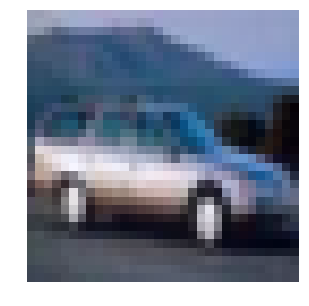

In [163]:
X = data['X_train'][4]
x = X.transpose(1,2,0)
l = np.max(x)-np.min(x)
x -= np.min(x)
x *= 255/l
plt.imshow(x.astype('uint8'))
plt.axis('off')
plt.gcf().set_size_inches(5, 5)
plt.show()

(34, 34, 3)


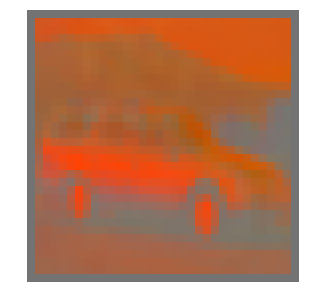

In [203]:
from cs231n.layers import *
# w1, b1 = model.params['W1'], model.params['b1']
w1 = np.random.randn(3,3,1,1)
b1 = np.zeros([3])
x = X[np.newaxis,:,:,:]
x = x.swapaxes(0,1)
conv_param = {'stride':1, 'pad': 1}
out, _ = conv_forward_vector(x, w1, b1, conv_param)
out = out.transpose(2,3,0,1)

x = np.zeros([32,32,3])
x[:,:,1] = out[1:-1,1:-1,0,0]
x = out[:,:,:,0]
l = np.max(x)-np.min(x)
x -= np.min(x)
x *= 255/l
print x.shape
plt.imshow(x.astype('uint8'))
plt.axis('off')
plt.gcf().set_size_inches(5, 5)
plt.show()